## Connect to the Northwind dataset using SQL

In [4]:
import pandas as pd
import numpy as np


import psycopg2

constr =  "host='dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com' dbname='northwind' user='dsi_student' password = 'gastudents'"

conn = psycopg2.connect(constr)

#used read_sql method to pull in data with column headers, also easier to perform JOIN using SQL rather than
#doing this in Pandas
df = pd.read_sql('SELECT * FROM orders JOIN order_details ON orders."OrderID" = order_details."OrderID"', conn)

conn.close()
df.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,10248,11,14.0,12,0.0
1,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,10248,42,9.8,10,0.0
2,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,10248,72,34.8,5,0.0
3,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,10249,14,18.6,9,0.0
4,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,10249,51,42.4,40,0.0


## Create a pandas df that is the combination of the orders and order_details tables
Each row of your df represents a unique order / product pair.  You could either bring in the tables separately, and join in pandas, or join in SQL, and bring in one table.  Ideally you should try both ways to practice!

## Explore the data!  Convert data types as appropriate, calculate new variables, do some exploratory analysis with pivot_tables and plotting
You can treat this as an open-ended assignment, and decide what you want to explore, or you can answer the questions below.

### 1)  Which employee had the highest total revenues?  Plot a bar chart to show this.

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

#revenue = quantity * (unitprice - discount)

df['revenue'] = df['Quantity']*(df['UnitPrice']-df['Discount'])

              revenue
EmployeeID           
1           201667.70
2           177378.66
3           212636.35
4           249480.80
5            75344.70
6            78000.15
7           140884.49
8           133003.63
9            82740.15


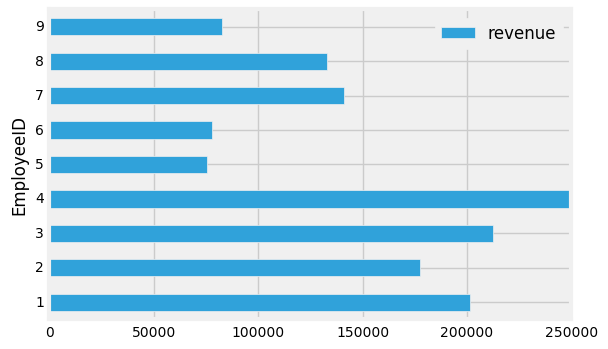

In [6]:
print pd.pivot_table(df, index=['EmployeeID'], values = ['revenue'], aggfunc=sum)
pd.pivot_table(df, index=['EmployeeID'], values = ['revenue'], aggfunc=sum).plot(kind = 'barh')
#would like to sort values in descending order but unable to with sort or sort_values
#chose to use horizontal bar chart

Employee 4 had the highest revenue (after discounts)

In [41]:
df.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,OrderID,ProductID,UnitPrice,Quantity,Discount,revenue,Month,ShippedMonth,MonthShipped,ProcessingTime
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,10248,11,14.0,12,0.0,168.0,1996-07-16,7.0,7.0,12.0
1,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,10248,42,9.8,10,0.0,98.0,1996-07-16,7.0,7.0,12.0
2,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,10248,72,34.8,5,0.0,174.0,1996-07-16,7.0,7.0,12.0
3,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,...,10249,14,18.6,9,0.0,167.4,1996-07-10,7.0,7.0,5.0
4,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,...,10249,51,42.4,40,0.0,1696.0,1996-07-10,7.0,7.0,5.0


### Challenge: create a scatter plot of unit price / quantity and colour-code by employee

In [42]:
sp_dict = {'x': df['UnitPrice'], 'y': df['Quantity'], 'z':df['EmployeeID']}

In [43]:
sp = pd.DataFrame(sp_dict)

In [51]:
plt.style.use('ggplot')

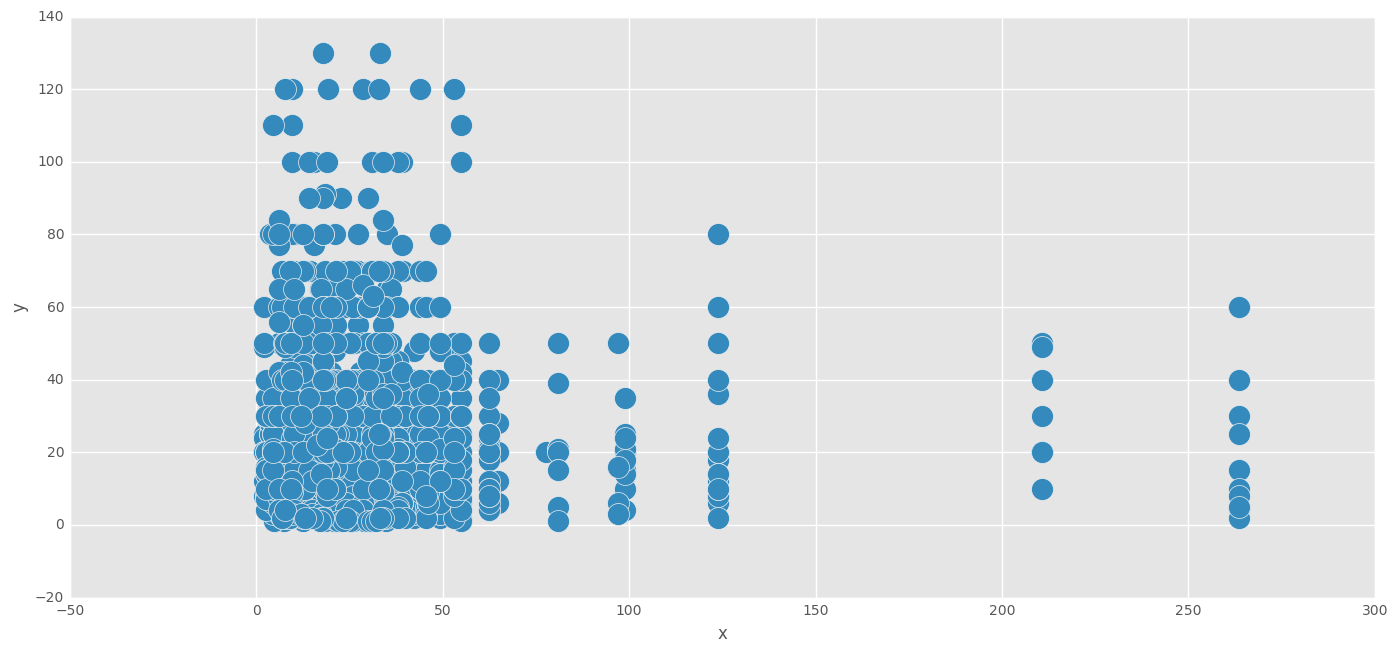

In [54]:
sp.plot(x='x', y='y', kind='scatter', figsize=(15,7), s =250)

### 2) Calculate and plot the total volume of products shipped by month

In [17]:
import datetime

df['MonthShipped'] = df['ShippedDate'].apply(pd.to_datetime)
df['MonthShipped'] = df['MonthShipped'].apply(lambda x: x.month)

#used solution to find this method, wasn't sure how to splice up date...i

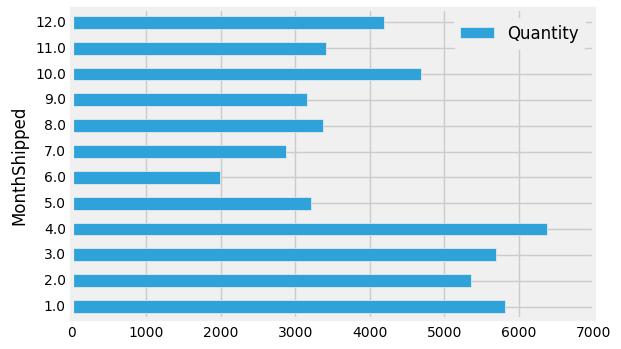

In [28]:
# ProductID
# Quantity
# Date


pd.pivot_table(df, index = ['MonthShipped'], values = ['Quantity'], aggfunc=sum).plot(kind='barh')

In [30]:
df.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,...,ShipCountry,OrderID,ProductID,UnitPrice,Quantity,Discount,revenue,Month,ShippedMonth,MonthShipped
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,France,10248,11,14.0,12,0.0,168.0,1996-07-16,7.0,7.0
1,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,France,10248,42,9.8,10,0.0,98.0,1996-07-16,7.0,7.0
2,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,France,10248,72,34.8,5,0.0,174.0,1996-07-16,7.0,7.0
3,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,...,Germany,10249,14,18.6,9,0.0,167.4,1996-07-10,7.0,7.0
4,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,...,Germany,10249,51,42.4,40,0.0,1696.0,1996-07-10,7.0,7.0


### 3) Calculate and plot a histogram of the number of days taken to ship

In [ ]:
#order date, shipped date
#shipped date - order date

df['MonthShipped'] = df['ShippedDate'].apply(pd.to_datetime)

In [31]:
df['OrderDate'] = df['OrderDate'].apply(pd.to_datetime)
df['ShippedDate'] = df['ShippedDate'].apply(pd.to_datetime)

In [36]:
#used solution file for dt.days

df['ProcessingTime'] = df['ShippedDate'] - df['OrderDate']
df['ProcessingTime'] = df['ProcessingTime'].dt.days

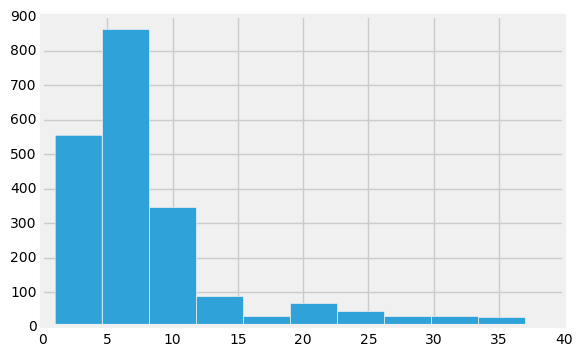

In [37]:
df['ProcessingTime'].hist()

### Challenge: compare the distributions for USA and UK on one plot

### 4) Plot the daily revenues over time (by Order Date)

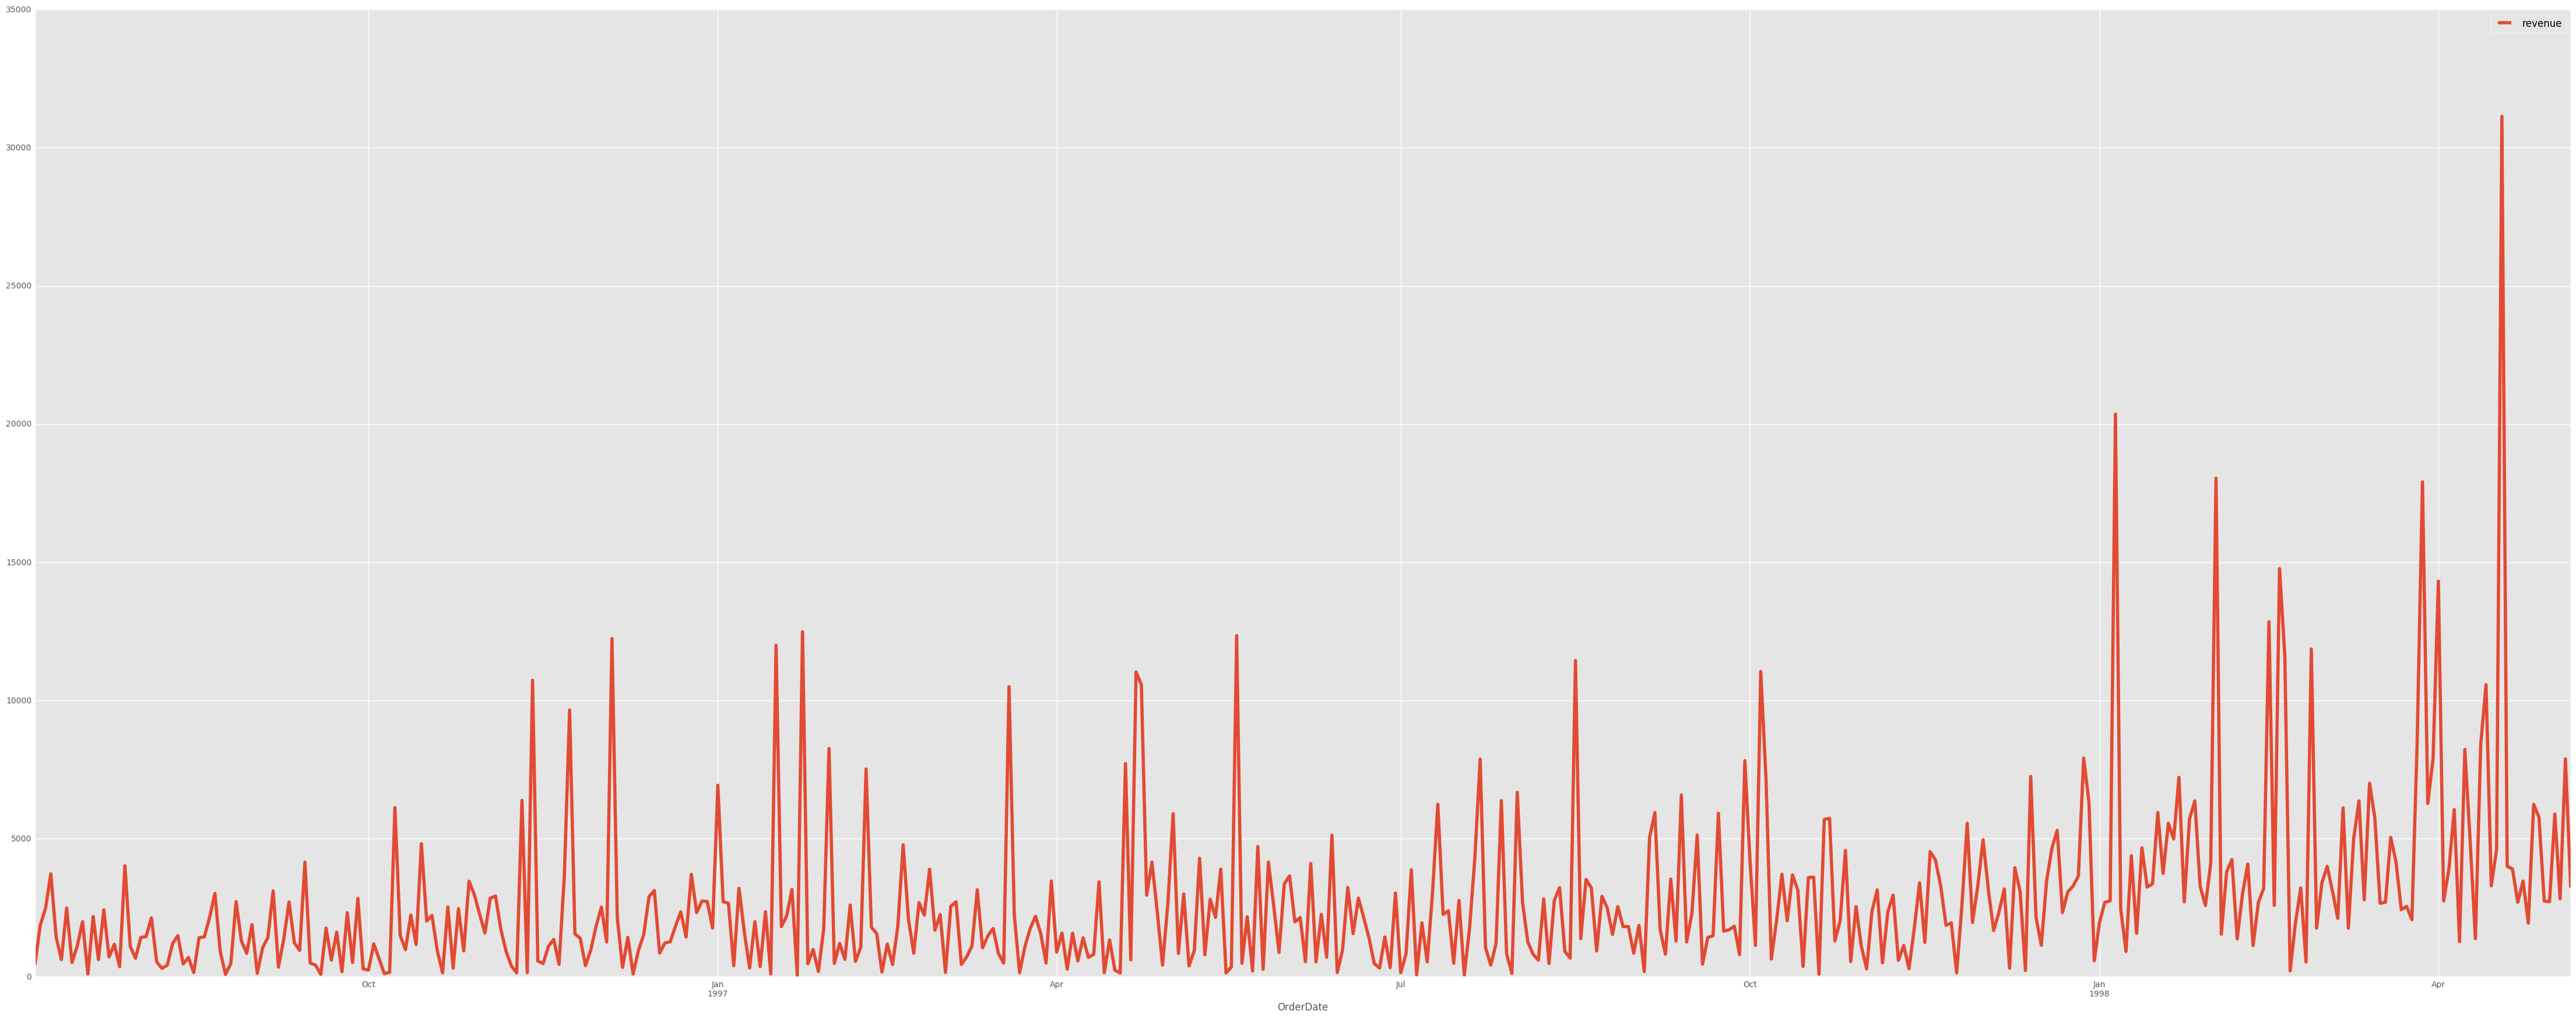

In [61]:
#pivot table 

pd.pivot_table(df, index=['OrderDate'], values=['revenue'], aggfunc=sum).plot(figsize=(50,20))